In [20]:
import sqlite3
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
conn = sqlite3.connect("telecomunicaciones.db")
cursor = conn.cursor()

In [22]:
# Cargar datos desde los archivos Excel subidos
df_internet = pd.read_excel("/content/drive/MyDrive/proyecto_individual_2(Henry,internet)/Internet.xlsx", sheet_name="Acc_vel_loc_sinrangos")
df_mapa = pd.read_excel("/content/drive/MyDrive/proyecto_individual_2(Henry,internet)/mapa_conectividad.xlsx", sheet_name="Hoja3")
df_portabilidad = pd.read_excel("/content/drive/MyDrive/proyecto_individual_2(Henry,internet)/Portabilidad.xlsx", sheet_name="Portin")
df_postales = pd.read_excel("/content/drive/MyDrive/proyecto_individual_2(Henry,internet)/servicios_postales.xlsx", sheet_name="ventas_postales")
df_telefonia_fija = pd.read_excel("/content/drive/MyDrive/proyecto_individual_2(Henry,internet)/telefonia_fija.xlsx", sheet_name="Fija_prov_tipo")
df_telefonia_movil = pd.read_excel("/content/drive/MyDrive/proyecto_individual_2(Henry,internet)/Telefonia_movil.xlsx", sheet_name="SMS")
df_television = pd.read_excel("/content/drive/MyDrive/proyecto_individual_2(Henry,internet)/Television.xlsx", sheet_name="Accesos_prov_TV")

# Mostrar ejemplos de datos cargados
print("Internet:")
print(df_internet.head())
print("\nMapa Conectividad:")
print(df_mapa.head())


Internet:
        Partido   Localidad  link Indec Velocidad (Mbps)  Provincia  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.00      1.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.50      2.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.75     19.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.00     85.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.50    145.0

Mapa Conectividad:
      Provincia     Partido          Localidad  Población ADSL Cablemódem  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo      23408   SI         SI   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi        280   --         --   
2  BUENOS AIRES  25 de Mayo          Del Valle        899   SI         --   
3  BUENOS AIRES  25 de Mayo          Ernestina        145   SI         --   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte        547   --         --   

  Dial Up Fibra óptica Satelital Wireless Tel

In [23]:
# Resumen inicial de cada DataFrame
for df, name in zip(
    [df_internet, df_mapa, df_portabilidad, df_postales, df_telefonia_fija, df_telefonia_movil, df_television],
    ["Internet", "Mapa de Conectividad", "Portabilidad", "Servicios Postales", "Telefonía Fija", "Telefonía Móvil", "Televisión"]
):
    print(f"Resumen de {name}:")
    print(df.info())
    print(df.describe(include='all'))  # Estadísticas básicas
    print("\n")

Resumen de Internet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partido           18864 non-null  object 
 1   Localidad         18864 non-null  object 
 2   link Indec        18863 non-null  object 
 3   Velocidad (Mbps)  18864 non-null  object 
 4   Provincia         18864 non-null  float64
 5   Accesos           18857 non-null  float64
dtypes: float64(2), object(4)
memory usage: 884.4+ KB
None
             Partido           Localidad link Indec  Velocidad (Mbps)  \
count          18864               18864      18863           18864.0   
unique            24                 435       2781            2665.0   
top     BUENOS AIRES  General San Martín      OTROS         6371010.0   
freq            7172                 460         82             367.0   
mean             NaN                 NaN        NaN               NaN  

In [24]:
# Verificar valores faltantes en cada tabla
for df, name in zip(
    [df_internet, df_mapa, df_portabilidad, df_postales, df_telefonia_fija, df_telefonia_movil, df_television],
    ["Internet", "Mapa de Conectividad", "Portabilidad", "Servicios Postales", "Telefonía Fija", "Telefonía Móvil", "Televisión"]
):
    print(f"Valores faltantes en {name}:")
    print(df.isnull().sum())
    print("\n")

Valores faltantes en Internet:
Partido             0
Localidad           0
link Indec          1
Velocidad (Mbps)    0
Provincia           0
Accesos             7
dtype: int64


Valores faltantes en Mapa de Conectividad:
Provincia          0
Partido            0
Localidad          0
Población          0
ADSL               0
Cablemódem         0
Dial Up            0
Fibra óptica       0
Satelital          0
Wireless           0
Telefonía Fija     0
3G                 0
4G                 0
Link              12
Latitud            0
Longitud           0
dtype: int64


Valores faltantes en Portabilidad:
Año              0
Mes              0
Total general    0
dtype: int64


Valores faltantes en Servicios Postales:
Año                                                0
Mes                                                0
Correo oficial  + Correos Privados (en Pesos)      0
Unnamed: 3                                       138
Unnamed: 4                                       138
Unnamed: 5     

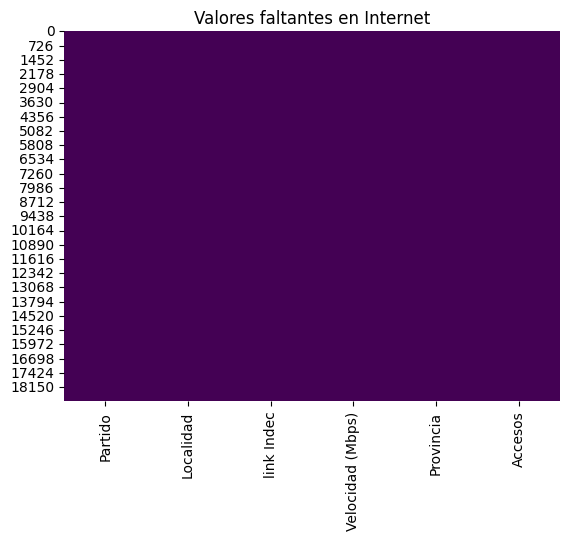

In [25]:
sns.heatmap(df_internet.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes en Internet")
plt.show()

In [26]:
# Verificar registros duplicados
for df, name in zip(
    [df_internet, df_mapa, df_portabilidad, df_postales, df_telefonia_fija, df_telefonia_movil, df_television],
    ["Internet", "Mapa de Conectividad", "Portabilidad", "Servicios Postales", "Telefonía Fija", "Telefonía Móvil", "Televisión"]
):
    duplicates = df.duplicated().sum()
    print(f"Registros duplicados en {name}: {duplicates}")


Registros duplicados en Internet: 0
Registros duplicados en Mapa de Conectividad: 0
Registros duplicados en Portabilidad: 0
Registros duplicados en Servicios Postales: 0
Registros duplicados en Telefonía Fija: 0
Registros duplicados en Telefonía Móvil: 0
Registros duplicados en Televisión: 0


In [27]:
# Eliminar duplicados
df_internet = df_internet.drop_duplicates()


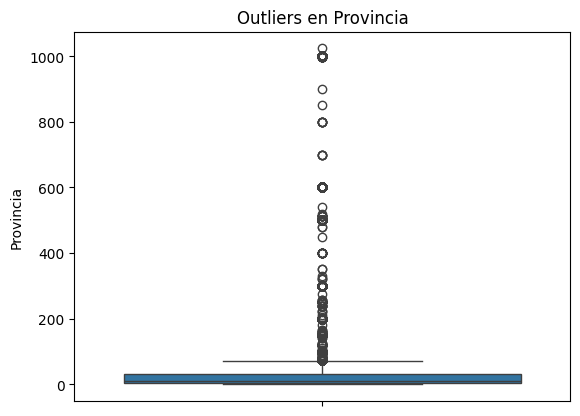

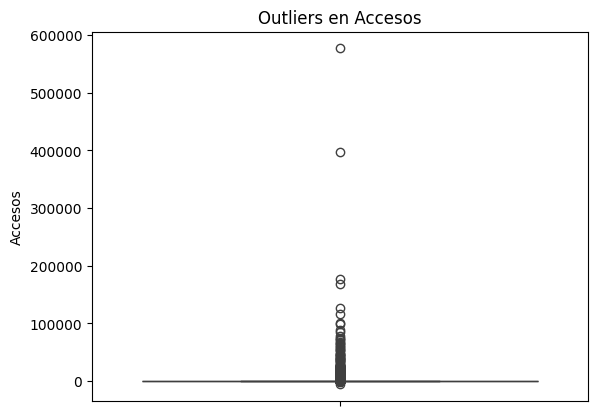

In [28]:
# Identificar valores atípicos con boxplots
numerical_columns = df_internet.select_dtypes(include=np.number).columns
for col in numerical_columns:
    sns.boxplot(df_internet[col])
    plt.title(f"Outliers en {col}")
    plt.show()


In [30]:
print(df_telefonia_fija.columns)


Index(['Año', 'Trimestre', 'Provincia', 'Accesos_telefonía_fija_total',
       'Accesos_telefonía_fija_hogares', 'Accesos_telefonía_fija_comercial',
       'Accesos_telefonía_fija_gobierno', 'Accesos_telefonía_fija_otros'],
      dtype='object')


In [31]:
# Renombrar columnas si es necesario
df_telefonia_fija.columns = df_telefonia_fija.columns.str.strip().str.replace(" ", "_").str.replace(r"[()]+", "", regex=True)

# Verificar nombres de columnas tras limpieza
print(df_telefonia_fija.columns)

# Usar el nombre correcto tras la limpieza
df_telefonia_fija["Accesos_telefonía_fija_total"] = pd.to_numeric(df_telefonia_fija["Accesos_telefonía_fija_total"], errors="coerce")


Index(['Año', 'Trimestre', 'Provincia', 'Accesos_telefonía_fija_total',
       'Accesos_telefonía_fija_hogares', 'Accesos_telefonía_fija_comercial',
       'Accesos_telefonía_fija_gobierno', 'Accesos_telefonía_fija_otros'],
      dtype='object')


In [34]:
if "Accesos_telefonía_fija_(total)" in df_telefonia_fija.columns:
    print("La columna existe")
else:
    print("La columna no existe")


La columna no existe


In [35]:
print(df_telefonia_fija.head())


    Año  Trimestre        Provincia  Accesos_telefonía_fija_total  \
0  2024          2     Buenos Aires                       3147886   
1  2024          2  Capital Federal                       1651854   
2  2024          2        Catamarca                         20365   
3  2024          2            Chaco                         53967   
4  2024          2           Chubut                         54140   

   Accesos_telefonía_fija_hogares  Accesos_telefonía_fija_comercial  \
0                         2793773                            299661   
1                         1466033                            157247   
2                           18074                              1939   
3                           47897                              5137   
4                           48049                              5154   

   Accesos_telefonía_fija_gobierno  Accesos_telefonía_fija_otros  
0                            12436                         42016  
1                       

In [37]:
print(df_television.columns)


Index(['Año', 'Trimestre', 'Provincia', 'Accesos_TV_por_suscripción_Vrf'], dtype='object')


In [38]:
# Normalizar nombres de columnas eliminando espacios y caracteres especiales
df_internet.columns = df_internet.columns.str.strip().str.replace(" ", "_").str.replace(r"[()]+", "", regex=True)
df_mapa.columns = df_mapa.columns.str.strip().str.replace(" ", "_").str.replace(r"[()]+", "", regex=True)
df_portabilidad.columns = df_portabilidad.columns.str.strip().str.replace(" ", "_").str.replace(r"[()]+", "", regex=True)
df_postales.columns = df_postales.columns.str.strip().str.replace(" ", "_").str.replace(r"[()]+", "", regex=True)
df_telefonia_fija.columns = df_telefonia_fija.columns.str.strip().str.replace(" ", "_").str.replace(r"[()]+", "", regex=True)
df_telefonia_movil.columns = df_telefonia_movil.columns.str.strip().str.replace(" ", "_").str.replace(r"[()]+", "", regex=True)
df_television.columns = df_television.columns.str.strip().str.replace(" ", "_").str.replace(r"[()]+", "", regex=True)

# Gestionar valores nulos
df_internet.fillna({"Velocidad_Mbps": 0, "Accesos": 0}, inplace=True)
df_mapa.fillna({"Latitud": 0, "Longitud": 0}, inplace=True)
df_postales = df_postales.dropna(how="all", axis=1)  # Eliminar columnas completamente vacías
df_portabilidad.fillna(0, inplace=True)
df_telefonia_fija.fillna(0, inplace=True)
df_telefonia_movil.fillna(0, inplace=True)
df_television.fillna(0, inplace=True)

# Convertir columnas relevantes a tipo numérico
df_internet["Velocidad_Mbps"] = pd.to_numeric(df_internet["Velocidad_Mbps"], errors="coerce")
df_internet["Accesos"] = pd.to_numeric(df_internet["Accesos"], errors="coerce")
df_mapa["Población"] = pd.to_numeric(df_mapa["Población"], errors="coerce")
df_telefonia_fija["Accesos_telefonía_fija_total"] = pd.to_numeric(df_telefonia_fija["Accesos_telefonía_fija_total"], errors="coerce")
df_telefonia_movil["Número_de_SMS_salientes"] = pd.to_numeric(df_telefonia_movil["Número_de_SMS_salientes"], errors="coerce")
df_television["Accesos_TV_por_suscripción_Vrf"] = pd.to_numeric(df_television["Accesos_TV_por_suscripción_Vrf"], errors="coerce")

# Crear filtros o agrupamientos según necesidad (ejemplo)
agrupado_provincia = df_internet.groupby("Provincia")[["Accesos", "Velocidad_Mbps"]].mean()

print(agrupado_provincia)

              Accesos  Velocidad_Mbps
Provincia                            
0.000      403.508274    3.473021e+07
0.256        2.365079    4.177045e+07
0.500       41.783489    3.533955e+07
0.512        2.143898    4.578760e+07
0.750       39.588028    2.127193e+07
...               ...             ...
850.000      1.000000    1.401401e+07
900.000    110.000000    6.200709e+07
999.000      3.352941    1.939510e+07
1000.000   539.558962    2.285481e+07
1024.000     1.000000    0.000000e+00

[118 rows x 2 columns]


In [40]:
print(df_internet.columns)


Index(['Partido', 'Localidad', 'link_Indec', 'Velocidad_Mbps', 'Provincia',
       'Accesos'],
      dtype='object')


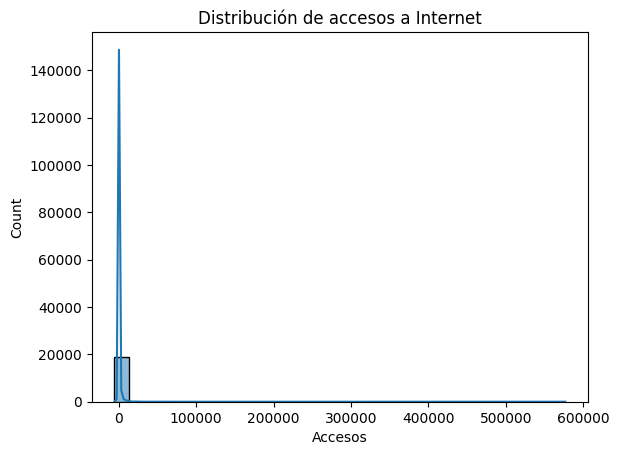

In [41]:
# Distribución de una variable cuantitativa
sns.histplot(df_internet['Accesos'], bins=30, kde=True)
plt.title("Distribución de accesos a Internet")
plt.show()


In [44]:
print(df_postales.columns.duplicated())
print(df_postales.columns[df_postales.columns.duplicated()])


[False False False False False False False False False False False]
Index([], dtype='object')


In [53]:
df_postales.to_sql("ServiciosPostales_new", conn, if_exists="replace", index=False)


138

In [54]:
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS ServiciosPostales;")
conn.commit()

# Luego guarda los datos
df_postales.to_sql("ServiciosPostales", conn, if_exists="replace", index=False)


138

In [47]:
print(df_postales.columns)


Index(['Año', 'Mes', 'Correo_oficial__+_Correos_Privados_en_Pesos', 'año',
       'trimestre', 'tipo', 'servicio', 'indicador', 'valor', 'unidad',
       'observaciones'],
      dtype='object')


In [48]:
df_postales = df_postales.rename(columns={"año": "año_duplicado"})


In [49]:
print(df_postales.columns)


Index(['Año', 'Mes', 'Correo_oficial__+_Correos_Privados_en_Pesos',
       'año_duplicado', 'trimestre', 'tipo', 'servicio', 'indicador', 'valor',
       'unidad', 'observaciones'],
      dtype='object')


In [50]:
df_postales.to_sql("ServiciosPostales", conn, if_exists="replace", index=False)


138

In [51]:
# Crear tablas en SQLite e insertar datos
df_internet.to_sql("Internet", conn, if_exists="replace", index=False)
df_mapa.to_sql("MapaConectividad", conn, if_exists="replace", index=False)
df_portabilidad.to_sql("Portabilidad", conn, if_exists="replace", index=False)
df_postales.to_sql("ServiciosPostales", conn, if_exists="replace", index=False)
df_telefonia_fija.to_sql("TelefoniaFija", conn, if_exists="replace", index=False)
df_telefonia_movil.to_sql("TelefoniaMovil", conn, if_exists="replace", index=False)
df_television.to_sql("Television", conn, if_exists="replace", index=False)

# Verificar las tablas creadas
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print("Tablas en la base de datos:", cursor.fetchall())

Tablas en la base de datos: [('Internet',), ('MapaConectividad',), ('Portabilidad',), ('ServiciosPostales',), ('TelefoniaFija',), ('TelefoniaMovil',), ('Television',)]


In [52]:
# Ejemplo: Consultar las primeras 5 filas de la tabla Internet
query = "SELECT * FROM Internet LIMIT 5;"
result = pd.read_sql(query, conn)

print(result)


        Partido   Localidad  link_Indec  Velocidad_Mbps  Provincia  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo       6854100.0       0.00      1.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo       6854100.0       0.50      2.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo       6854100.0       0.75     19.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo       6854100.0       3.00     85.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo       6854100.0       3.50    145.0


In [55]:
# Ejemplo de consulta SQL en la tabla Portabilidad
query_portabilidad = "SELECT * FROM Portabilidad LIMIT 5;"
result_portabilidad = pd.read_sql(query_portabilidad, conn)
print(result_portabilidad)


    Año  Mes  Total_general
0  2024    6         178024
1  2024    5         178256
2  2024    4         155812
3  2024    3         149604
4  2024    2         145787


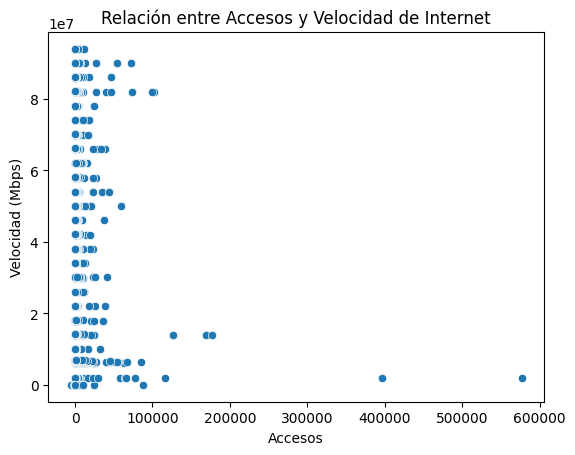

In [56]:
# Relación entre Accesos y Velocidad en Internet
sns.scatterplot(x=df_internet['Accesos'], y=df_internet['Velocidad_Mbps'])
plt.title('Relación entre Accesos y Velocidad de Internet')
plt.xlabel('Accesos')
plt.ylabel('Velocidad (Mbps)')
plt.show()


In [57]:
# Agrupar por provincia en la tabla de Internet y mostrar estadísticas adicionales
agrupado_provincia = df_internet.groupby("Provincia")[["Accesos", "Velocidad_Mbps"]].agg(["mean", "median", "std"])
print(agrupado_provincia)


              Accesos                     Velocidad_Mbps              \
                 mean median          std           mean      median   
Provincia                                                              
0.000      403.508274    9.0  3306.472510   3.473021e+07  26024535.0   
0.256        2.365079    1.0     4.643072   4.177045e+07  42014010.0   
0.500       41.783489    1.0   955.202519   3.533955e+07  26038540.0   
0.512        2.143898    1.0     4.695788   4.578760e+07  42147020.0   
0.750       39.588028    9.5   118.563946   2.127193e+07   6598550.0   
...               ...    ...          ...            ...         ...   
850.000      1.000000    1.0          NaN   1.401401e+07  14014010.0   
900.000    110.000000  110.0          NaN   6.200709e+07  62007090.0   
999.000      3.352941    2.0     5.700232   1.939510e+07   6805010.0   
1000.000   539.558962  142.5  3264.198410   2.285481e+07   6658010.0   
1024.000     1.000000    1.0          NaN   0.000000e+00        

In [58]:
# Consulta SQL que une la tabla Internet con la de Mapa de Conectividad (ejemplo)
query_combined = """
SELECT i.Provincia, i.Accesos, i.Velocidad_Mbps, m.Latitud, m.Longitud
FROM Internet i
JOIN MapaConectividad m ON i.Provincia = m.Provincia
LIMIT 10;
"""
result_combined = pd.read_sql(query_combined, conn)
print(result_combined)


Empty DataFrame
Columns: [Provincia, Accesos, Velocidad_Mbps, Latitud, Longitud]
Index: []


In [59]:
# Exportar el resultado de alguna consulta a un archivo CSV
result_combined.to_csv("resultados_combinados.csv", index=False)


In [60]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print("Tablas en la base de datos:", cursor.fetchall())


Tablas en la base de datos: [('Internet',), ('MapaConectividad',), ('Portabilidad',), ('TelefoniaFija',), ('TelefoniaMovil',), ('Television',), ('ServiciosPostales_new',), ('ServiciosPostales',)]
